# Exploratory Data Analysis (EDA)
Understanding the dataset's basic properties, distribution of variables, missing values, and potential correlations.

## Project: Amazon-Product-Sales-Analysis

### Business Context: 

Amazon’s business model is based on three value propositions: low price, fast delivery, and a wide selection of products. (businessmodelanalyst.com/amazon-business-model/)

Amazon makes money through a variety of streams, primarily including:
- E-commerce Sales: This is Amazon's core business model, where they sell products directly to consumers. They offer a wide range of items, from books and electronics to clothing and groceries.
- Third-Party Seller Services: Amazon allows third-party sellers to sell their products on its platform, earning money through commissions, shipping fees, and other related services.

The pricing of e-commerce products significantly impacts Amazon's profitability in several ways:

- Volume of Sales: Lower prices can lead to higher sales volume. Amazon often uses competitive pricing to attract more customers and increase the number of sales. This is based on the economic principle that demand usually increases as prices decrease. However, this means the profit margin per product might be lower, so Amazon relies on selling a larger volume of products to maintain profitability.

### Revised Project Objective:

### Original Objective:
The initial goal was to evaluate the impact of price discounts on the sales volume of e-commerce products, aiming to understand the effectiveness of discounts on sales.

### Updated Objective:
The project's focus shifted to leveraging the power of deep learning to predict sales performance. Specifically, the aim was to use the 'title' column to build a Convolutional Neural Network (CNN) capable of predicting the likelihood of a product selling over 100 units. This predictive modeling approach sought to understand and capture the nuanced patterns within product titles that correlate with higher sales volumes, thus providing valuable insights for optimizing product listings for better sales performance.

Our dataset includes one month of sales from September 2023 
(https://www.kaggle.com/datasets/asaniczka/amazon-products-dataset-2023-1-4m-products)

### Data Description
**Dataset** - E-commerce product listings.  
**File** - amazon_products.csv  

**Features include:**
- asin -  Product ID from Amazon. (type - str)
- title -  Title of the product. (type - str)
- imgUrl -  Url of the product image. (type - str)
- productURL -  Url of the product. (type - str)
- stars -  Product rating. If 0, no ratings were found. (type - float)
- reviews -  Number of reviews. If 0, no reviews were found. (type - int)
- price -  Buy now price of the product. If 0, price was unavailable. (type - float, currency -  USD)
- listPrice -  Original price of the product before discount. If 0, no list price was found AKA, no discounts. (type - float, currency -  USD)
- category_id -  Category identifier. Use the amazon_categories.csv to find the actual category name. (type - int)
- isBestSeller -  Whether the product had the Amazon BestSeller status or not. (type - bool)
- boughtInLastMonth -  Number of products sold last month according to Amazon. (type -  int)
    - This is your key target variable for analyzing sales volume.

**File** - amazon_categories.csv (to join for category names)
- id -  id of the category. Has a foreign key relationship with "category_id" on amazon_products.csv (type - int)
- category_name -  Name of the category as on Amazon.com. (type - str)

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="whitegrid")

# To reduce the plot size to not fill too much of the screen
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 75

# To use full width of screen for output of cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Defining Functions
The below functions need to be defined to carry out the EDA

In [2]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [3]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    palette = sns.color_palette("deep")[0]  # This gives the first color of the 'deep' palette which is a blue
    ax = sns.countplot(
        data=data,
        x=feature,
        color=palette,
#         palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Load Dataset

In [4]:
products = pd.read_csv("../data/amazon_products.csv")
categories = pd.read_csv("../data/amazon_categories.csv")

### Looking at first row of each dataframe to check if category IDs look good to join on

In [5]:
products.head(1)

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.50,0,139.99,0.00,104,False,2000


- category_id 104 is luggage, so let's filter for that in categories dataframe

In [6]:
categories[categories.id == 104].head()

,id,category_name
94,104,Suitcases


- Let's join and validate that we have the row count

### Checking number of rows and columns

In [7]:
print(products.shape)
print(categories.shape)

(1426337, 11)
(248, 2)


### Use merge to join on IDs

In [8]:
data = products.merge(categories, left_on='category_id', right_on='id')
data.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.50,0,139.99,0.00,104,False,2000,104,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.50,0,169.99,209.99,104,False,1000,104,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.60,0,365.49,429.99,104,False,300,104,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.60,0,291.59,354.37,104,False,400,104,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.50,0,174.99,309.99,104,False,400,104,Suitcases


- Same number of records checks out
- We have the cateory_name now, so we can drop the ID columns which are just identifiers

- If each record is a unique product, then the data appears to be aggregated at monthly units for each product

In [9]:
# Create a copy of the dataset to preserve the original
df = data.drop(columns=['category_id','id'], axis=1).copy()

**We know that 'boughtInLastMonth' is quanity sold, so let's rename to 'units' to make the feature name more clear**

In [10]:
df.rename(columns={'boughtInLastMonth': 'units'}, inplace=True)

**For consistency, let's also lowercase all feature names and switch from camelCase to underscores**

In [11]:
df.columns = df.columns.str.lower()
df.columns

Index(['asin', 'title', 'imgurl', 'producturl', 'stars', 'reviews', 'price',
       'listprice', 'isbestseller', 'units', 'category_name'],
      dtype='object')

In [12]:
df.rename(columns={'imgurl': 'img_url', 'producturl': 'product_url', 'listprice': 'list_price', 'isbestseller': 'is_best_seller'}, inplace=True)
df.columns

Index(['asin', 'title', 'img_url', 'product_url', 'stars', 'reviews', 'price',
       'list_price', 'is_best_seller', 'units', 'category_name'],
      dtype='object')

**Peeking at the revised dataframe**

In [13]:
# Here's what our dataset looks like now
df.head()

,asin,title,img_url,product_url,stars,reviews,price,list_price,is_best_seller,units,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.50,0,139.99,0.00,False,2000,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.50,0,169.99,209.99,False,1000,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.60,0,365.49,429.99,False,300,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.60,0,291.59,354.37,False,400,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.50,0,174.99,309.99,False,400,Suitcases


### Checking for duplicate records

In [14]:
df.duplicated().sum()

0

- No dupes in the dataset

### Display data types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   asin            1426337 non-null  object 
 1   title           1426336 non-null  object 
 2   img_url         1426337 non-null  object 
 3   product_url     1426337 non-null  object 
 4   stars           1426337 non-null  float64
 5   reviews         1426337 non-null  int64  
 6   price           1426337 non-null  float64
 7   list_price      1426337 non-null  float64
 8   is_best_seller  1426337 non-null  bool   
 9   units           1426337 non-null  int64  
 10  category_name   1426337 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 110.2+ MB


- The dataset contains 1 boolean, 5 numeric, and 5 categorical features

### Display count of unique values in each feature

In [16]:
df.nunique()

asin              1426337
title             1385430
img_url           1372162
product_url       1426337
stars                  41
reviews             11861
price               29961
list_price          14518
is_best_seller          2
units                  30
category_name         248
dtype: int64

In [17]:
# dropping unique product identifier 
df.drop(columns=['asin'], axis=1, inplace=True)

### Display summary statistics

**Numerical variables**

In [18]:
# Numerical variables
df.describe().round(2)

,stars,reviews,price,list_price,units
count,1426337.00,1426337.00,1426337.00,1426337.00,1426337.00
mean,4.00,180.75,43.38,12.45,141.98
std,1.34,1761.45,130.29,46.11,836.27
min,0.00,0.00,0.00,0.00,0.00
25%,4.10,0.00,11.99,0.00,0.00
50%,4.40,0.00,19.95,0.00,0.00
75%,4.60,0.00,35.99,0.00,50.00
max,5.00,346563.00,19731.81,999.99,100000.00


- `stars` - ranges from 0 to 5 (If 0, no ratings were found)
- `reviews` - at least 75% of products were not reviewed
- `price` - some products were unavailble (if 0, price was unavailable)
- `list_price` - at least 75% of products were not discounted (if 0, no discounts, thus the only price available will fall under price; this is also why max price can be higher than max list_price)
- `units` - at least 50% of products were not sold (units = 0)   
<br>
- All but stars have huge outliers on the upper end and highly skewed distributions, which could affect the performance and interpretation of predictive models
- Scales are different, we'll have to scale before model building

- For univariate visualizations, we will only need to visualize stars, since the others are clearly highly left skewed.

**All numerical values have min value of zero, so let's see how many zeros in each**

In [19]:
# Filter for numeric columns only
numeric_df = df.select_dtypes(include=[np.number])
(numeric_df == 0).sum()/numeric_df.shape[0]

stars        0.09
reviews      0.79
price        0.02
list_price   0.76
units        0.64
dtype: float64

- 79% of products have no reviews, while only 9% of products have no star rating
- 2% of products were unavailable
- 76% of products were not discounted 
- 64% of products were not sold

**For the focused objective of understanding sales volume, it's generally advisable to exclude periods when the product was unavailable. This ensures that the analysis is clean, direct, and relevant. Therefore, let's exclude records where price = 0, which we know from the data description**

**Categorical variables**

In [20]:
# Categorical variables
df.describe(exclude=np.number).T

,count,unique,top,freq
title,1426336,1385430,Men's Sneaker,89
img_url,1426337,1372162,https://m.media-amazon.com/images/I/01RmK+J4pJ...,1130
product_url,1426337,1426337,https://www.amazon.com/dp/B014TMV5YE,1
is_best_seller,1426337,2,False,1417817
category_name,1426337,248,Girls' Clothing,28619


- **productURL** - we may want to go to these links to investigate further on any products or use the links to potentially web scrape  
- **title and imgUrl** have slightly fewer records than the unique identifiers, so a few products must share the same title and imageUrl  
- **is_best_seller** only a very small number of products are best sellers

**isBestSeller (from chatGPT4)** - "The definition of a "bestseller" on Amazon refers to products that sell in higher quantities than others within a specific category or across the platform over a certain period."
- **High Sales Volume**: Bestsellers are items that have sold more units than their competitors in a specific category or across the site within a certain timeframe. This is usually the most critical factor in determining a bestseller.
- **Category-Specific**: Because bestseller status is typically determined within specific categories (like books, electronics, clothing, etc.), a product can be a bestseller in one category without being a top seller across the entire Amazon platform.
- **Ratings and Reviews**: While primarily determined by sales volume, customer ratings and reviews can indirectly affect bestseller status. Highly rated products are more likely to be purchased, thereby increasing sales volume and potentially improving their bestseller rank.

### Checking for missing values

In [21]:
df.isnull().sum()

title             1
img_url           0
product_url       0
stars             0
reviews           0
price             0
list_price        0
is_best_seller    0
units             0
category_name     0
dtype: int64

- Only one missing value in 'title' which we'll handle later under feature engineering

**Let's see how many products did not sell**

## Data visualizations

### Univaritate analysis

**Numerical**

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


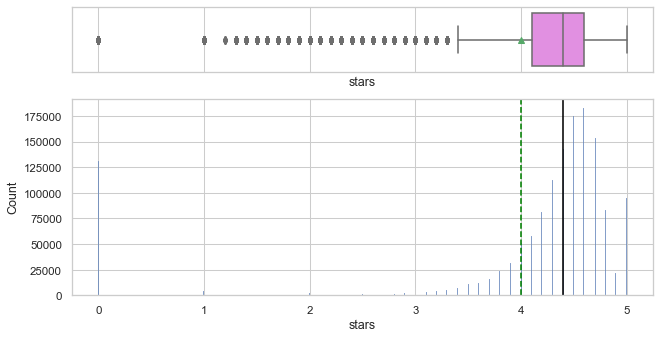

In [22]:
histogram_boxplot(df, 'stars')

- More than 75% of products were rated between 4 and 5 stars

**Categorical**

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


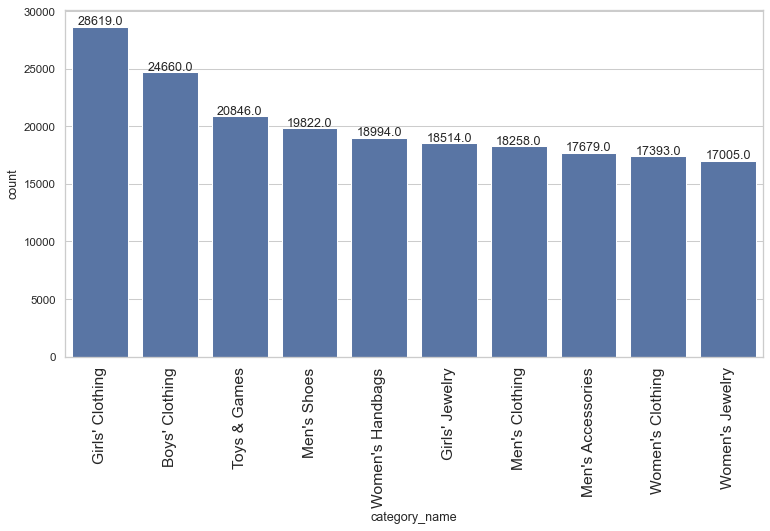

In [23]:
# Most popular categories by count
labeled_barplot(df, 'category_name', n=10)

- The most popular products fall under Girls' and Boys' clothing (top 2), which makes sense as the data is for September when a new school year begins

### Multivaritate analysis

**Correlation Check**

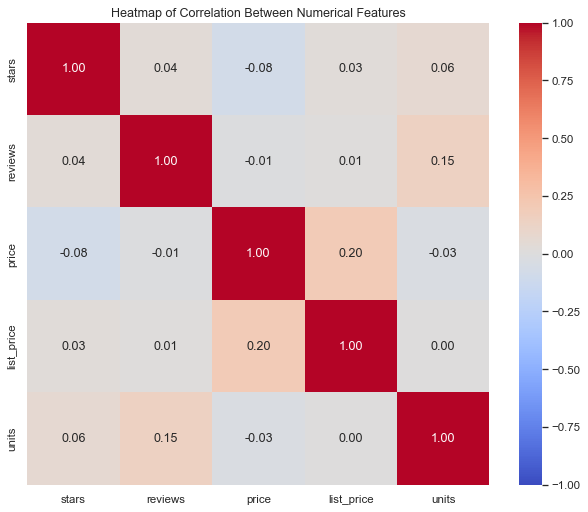

In [24]:
# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])
# Compute the correlation matrix
corr_matrix = numerical_features.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, vmin=-1)
plt.title('Heatmap of Correlation Between Numerical Features')
plt.show()

None of the independent variables have a high correlation with the target

- **Predictive Modeling Implications:** For predictive modeling, features with low correlations to the target variable ('units' in this case) might not be very useful on their own in a linear model. However, they could still be important in non-linear models or could have interaction effects with other variables.

In summary, the heatmap suggests that the features included do not have strong linear relationships with each other. We might need to consider non-linear models, feature engineering to uncover non-linear relationships, or including additional data that could have stronger predictive power.

**category_name vs units (let's look at top 10 categories)**

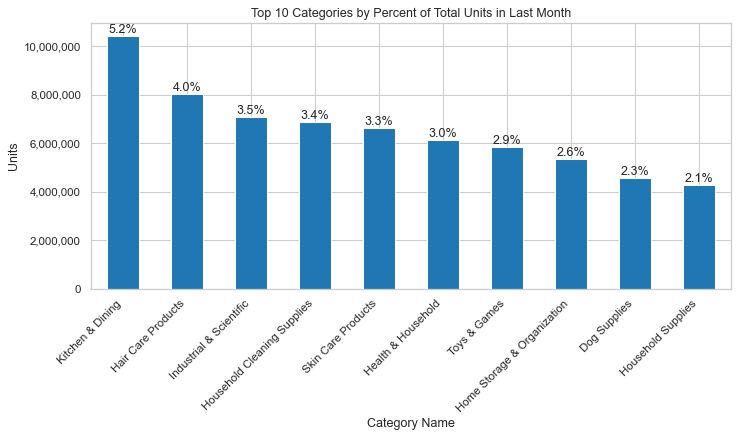

In [25]:
# Filter the top 10 categories
top_categories = df.groupby('category_name')['units'].sum().nlargest(10)

# Calculate the total units
total_units = df.units.sum()

# Plotting
plt.figure(figsize=(10, 6))
ax = top_categories.plot(kind='bar', color='#1f77b4')  # Assuming you want the same blue color as before

# Set y-axis formatter
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Top 10 Categories by Percent of Total Units in Last Month')
plt.xlabel('Category Name')
plt.ylabel('Units')

# Add labels to each bar as a percent of the total
for i, value in enumerate(top_categories):
    percent = (value / total_units) * 100  # Calculate the percentage
    plt.text(i, value, f'{percent:.1f}%', ha='center', va='bottom')
    
plt.xticks(rotation=45, ha='right')  # Rotate category names for better visibility
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

- About 4 or 5 household items are in the top 10, as well as about 3 or 4 personal care items

**Highest average price by category_name**

In [26]:
# Calculate the average price for each category
average_price_per_category = df.groupby('category_name')['price'].mean()  # or use .max() for maximum price
average_price_per_category.sort_values(ascending=False).head(10)

category_name
Computer Servers                 1534.22
Computers & Tablets               544.38
Smart Home: Home Entertainment    347.99
Luggage Sets                      229.59
Smart Home: Vacuums and Mops      221.13
Smart Home - Heating & Cooling    220.46
Computer Monitors                 219.81
Computer External Components      163.55
Video Projectors                  162.00
Camera & Photo                    160.58
Name: price, dtype: float64

- Most are electronics products

**Highest average star rating by category_name**

In [27]:
# Calculate the average star rating for each category
average_price_per_category = df.groupby('category_name')['stars'].mean() 
average_price_per_category.sort_values(ascending=False).head(10)

category_name
Gift Cards                          4.83
Health & Household                  4.57
Industrial & Scientific             4.55
Household Supplies                  4.55
Kitchen & Dining                    4.54
Food Service Equipment & Supplies   4.52
Electrical Equipment                4.52
Power Tools & Hand Tools            4.50
Sports & Outdoors                   4.50
Electronic Components               4.49
Name: stars, dtype: float64

**is_best_seller vs units, stars, reviews**

In [28]:
# Calculate the sum of each group for the specified columns
grouped_sum = df.groupby('is_best_seller')[['units', 'stars', 'reviews']].sum()

# Calculate the sum of the entire DataFrame for the specified columns
total_sum = df[['units', 'stars', 'reviews']].sum()

# Divide the grouped sum by the total sum and multiply by 100 to get the percentage
grouped_percentage = (grouped_sum / total_sum) * 100

# Display the resulting DataFrame with percentages
grouped_percentage.T

is_best_seller,False,True
units,90.22,9.78
stars,99.33,0.67
reviews,92.34,7.66


- 10% of units come from best sellers
- Only 0.7% of best sellers have star ratings
- 8% of best sellers have reviews

**What are best selling categories (is_best_seller == True)?**

In [29]:
# Filter the DataFrame to only include rows where 'is_best_seller' is True
best_sellers = df[df['is_best_seller'] == True]

# Group by 'category_name' and apply multiple aggregations: count and sum of units
best_seller_aggregates = best_sellers.groupby('category_name').agg(
    count=('category_name', 'size'),  # Count the occurrences
    units_sum=('units', 'sum')       # Sum the units
)

# Sort by count in descending order and filter out categories with count of 1 or less
best_seller_aggregates_sorted = best_seller_aggregates[best_seller_aggregates['count'] > 1].sort_values(by='count', ascending=False)

# Display the top 20 results
best_seller_aggregates_sorted.head(20)


,count,units_sum
category_name,,
Sports & Fitness,483,593300
Industrial & Scientific,404,1291600
Automotive Replacement Parts,368,217950
Kitchen & Dining,279,1808000
Sports & Outdoors,259,760750
Toys & Games,240,659100
Tools & Home Improvement,240,516400
Women's Clothing,164,287200
Outdoor Recreation,150,186500


**Are any of the top 10 categories by units not best sellers?**

In [30]:
# Convert top_categories Series to a dataframe
top_categories_df = top_categories.reset_index()

# Get category_name filtered on best sellers
best_seller_categories = df[df['is_best_seller'] == True]['category_name']

# Display which top categories by units are not best sellers
top_categories_df[~top_categories_df['category_name'].isin(best_seller_categories)]['category_name']

Series([], Name: category_name, dtype: object)

- No, all of top 10 categories by units are best sellers

### Save final dataframe as csv for subsequent notebook

In [31]:
# Save the final DataFrame after EDA
final_df = df  

# Specify the file name
output_file_name = '../data/eda_dataset.csv' 

# Save to CSV
final_df.to_csv(output_file_name, index=False)

# Print a confirmation message
print(f"DataFrame saved as '{output_file_name}'.")


DataFrame saved as '../data/eda_dataset.csv'.


In [32]:
df.title.str.lower()

0          sion softside expandable roller luggage, black...
1          luggage sets expandable pc+abs durable suitcas...
2          platinum elite softside expandable checked lug...
3          freeform hardside expandable with double spinn...
4          winfield 2 hardside expandable luggage with sp...
                                 ...                        
1426332    soundbox 0 gauge amp kit amplifier install wir...
1426333    nextbase 622gw front and rear dash cam true 4k...
1426334    newest wireless android auto car adapter for o...
1426335    android 11 car radio for jeep wrangler 2011 20...
1426336    red wolf radio wiring harness w/antenna adapte...
Name: title, Length: 1426337, dtype: object

In [33]:
import string

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Example
text = "Here's an Example! Text, with Punctuation."
processed_text = preprocess_text(text)
print(processed_text)

heres an example text with punctuation
